# Notebook Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [19]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [20]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [21]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### The Dot Product

In [22]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [23]:
a.dot(b)

22

In [24]:
1*0 + 2*5 + 3*4

22

In [25]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [26]:
print(a.dot(c))
print('shape of the dot product is', a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [27]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

**Challenge**: Can you figure out the dimensions of the dot product between X_test and prob_token_spam? 

In [28]:
X_test.shape

(1724, 2500)

In [29]:
prob_token_spam.shape

(2500,)

In [30]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [31]:
PROB_SPAM = 0.3116

**Challenge**: Do you recall how to take the log of a numpy array? Calculate the log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam. 

In [32]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format

In [33]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [34]:
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

**Challenge**: Calculate the log probability that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [35]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [36]:
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

In [37]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

**Challenge**: Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called `prediction`.

In [38]:
prediction = joint_log_spam > joint_log_ham

In [39]:
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [40]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [41]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [42]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [44]:
# Accuracy
round(correct_docs/len(X_test))

1

In [45]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualising the Results

In [46]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

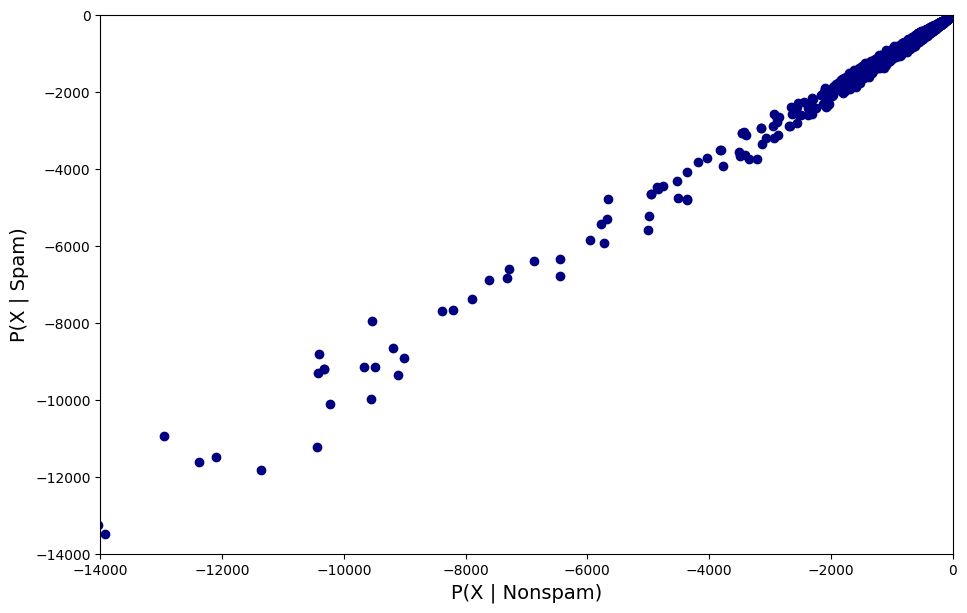

In [47]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

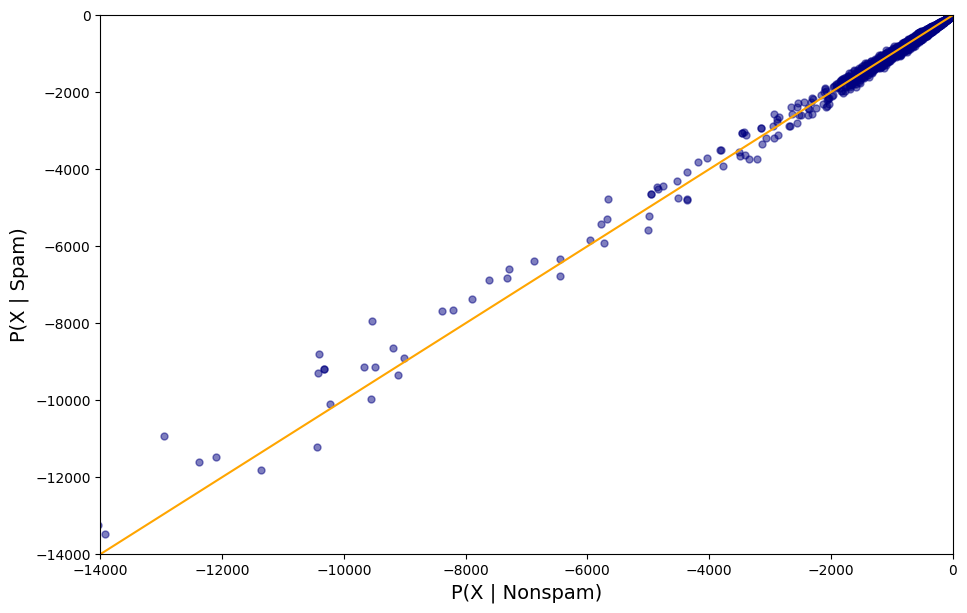

In [48]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

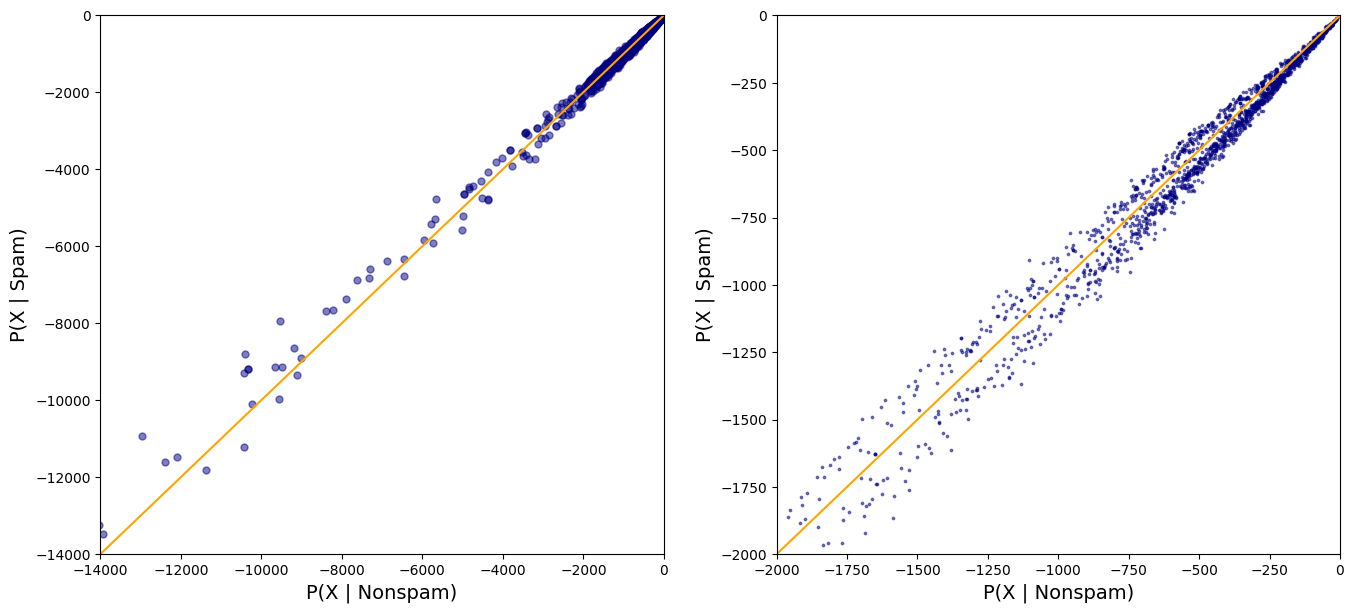

In [49]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [50]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

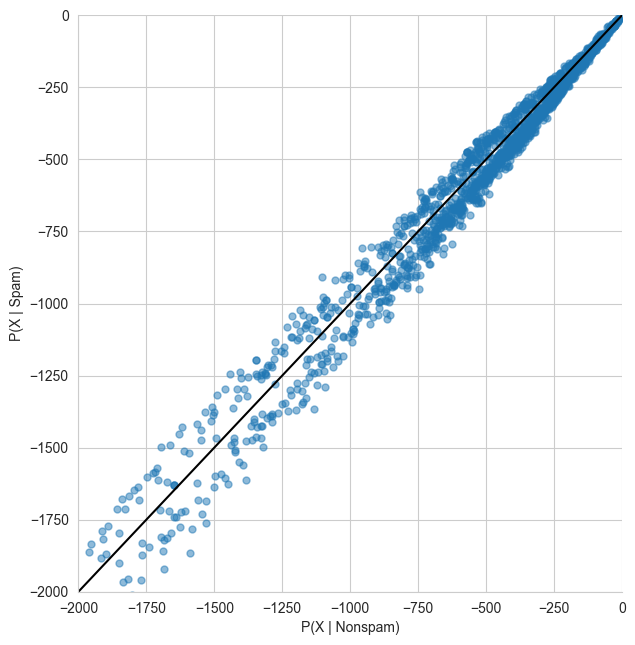

In [53]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

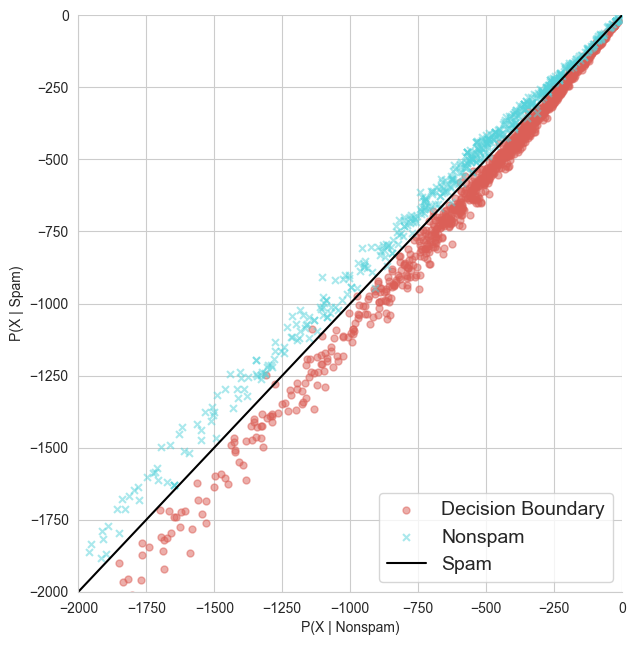

In [54]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

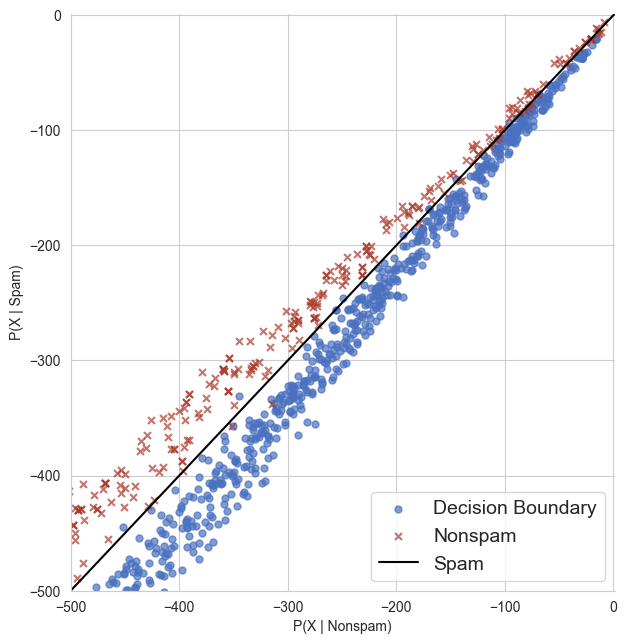

In [55]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [56]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [57]:
true_pos = (y_test == 1) & (prediction == 1)

In [58]:
true_pos.sum()

569

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called ```false_neg```

In [59]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [60]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score

**Challenge:** Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to two decimal places.

In [61]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.60%


## Precision Score

**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to three decimal places. 

In [62]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.968


## F-Score or F1 Score

In [63]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
